### Importing libraries

... and specifying file_path and running other requied lines

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use ('ggplot')
file_path = r'C:\Users\student\Documents\Python Scripts\datasets\boston_housing.csv'

### Getting data

In [2]:
housing = np.genfromtxt (file_path, delimiter = ',') # generates array from text
# print (housing)
points = np.array (housing[1:, [0, 3]])
print (points[0:10, :])

[[6.575e+00 5.040e+05]
 [6.421e+00 4.536e+05]
 [7.185e+00 7.287e+05]
 [6.998e+00 7.014e+05]
 [7.147e+00 7.602e+05]
 [6.430e+00 6.027e+05]
 [6.012e+00 4.809e+05]
 [6.172e+00 5.691e+05]
 [5.631e+00 3.465e+05]
 [6.004e+00 3.969e+05]]


### Plotting data

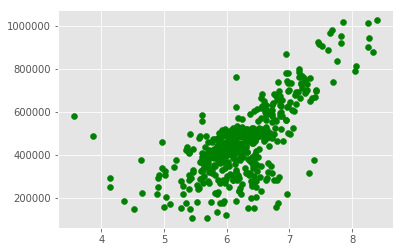

In [3]:
x = points[:, 0]
y = points[:, 1]
plt.scatter (x, y, color = 'g')
plt.show ()

### Defining Error function

Calculates sum of square error (SSE) for slope (m) and y-intercept (b) for the fitting line

In [4]:
def Error (m, b, points):
    error = 0
    N = len (points)
    for i in range (len (points)):
        x = points[i, 0]
        y = points[i, 1]
        error += (1/N) * (y - (m * x + b))**2 
    return error

### Defining GradDescent function

Evaluates the new slope and new y-intercept. New slope and intercept are directly proportional to the learning rate.

In [5]:
def GradDescent (m ,b, points, learning_rate):
    m_slope, b_slope = 0, 0
    N = len (points)
    for i in range (len (points)):
        x = points[i, 0]
        y = points[i, 1]
        m_slope += (-2/N) * x * (y - (m * x + b))
        b_slope += (-2/N) * (y - (m * x + b))
    new_m = m - (learning_rate * m_slope)
    new_b = b - (learning_rate * b_slope)
    return (new_m, new_b)

### Main function

Calls the GradDescent function and the Error function.

learn_rate: 1%

iterations: 1e3

initial slope: 10

initial y-intercept: 10

In [6]:
learn_rate = 0.01
iterations = 10000
m, b = 10, 10
errors = []
print ('Starting at slope (m) =', m, 'and y-intercept (b) =', b, 'with error =', Error (m, b, points))
for i in range(iterations):
    m , b = GradDescent (m, b, points, learn_rate)
    errors.append (Error(m, b, points))
print ('New slope (m) =', m, 'and new y-intercept (b) =', b, 'with error =', Error (m, b, points))

Starting at slope (m) = 10 and y-intercept (b) = 10 with error = 233641747054.17175
New slope (m) = 165318.49524199934 and new y-intercept (b) = -576401.7908219759 with error = 14099246052.594276


### Plotting

Plotting the data points, the fitting line and the change in errors.

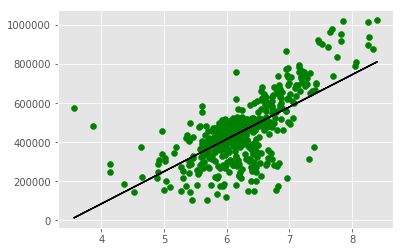

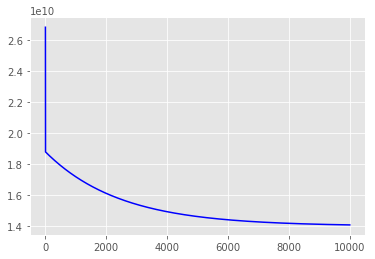

In [7]:
plt.scatter (x, y, color = 'g')
plt.plot (x, [m * i + b for i in x], color = '0')
plt.show ()

plt.plot (np.arange (iterations), errors, color='b')
plt.show ()

In [8]:
# doing linear regression using sklearn

x = housing[1:, :3] # multi dimensional linear regression
y = housing[1:, -1]
print (x[:5])
print (y[:5])

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.3, random_state = 15)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

from sklearn.linear_model import LinearRegression

lr = LinearRegression ()
lr.fit (x_train, y_train)
print (lr.score (x_test, y_test))

[[ 6.575  4.98  15.3  ]
 [ 6.421  9.14  17.8  ]
 [ 7.185  4.03  17.8  ]
 [ 6.998  2.94  18.7  ]
 [ 7.147  5.33  18.7  ]]
[504000. 453600. 728700. 701400. 760200.]
(342, 3) (342,)
(147, 3) (147,)
0.7272232128863395
